In [1]:
# problem statement -> reviewing the experience of the airline passengers satisfaction either they are satisfited or dissatisfied. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv(r'C:\Users\MYPC\Downloads\archive\train.csv')
test_data = pd.read_csv(r'C:\Users\MYPC\Downloads\archive\test.csv')

In [4]:
train_data.shape,test_data.shape

((103904, 25), (25976, 25))

In [5]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

(None, None)

In [6]:
train_data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
test_data.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [8]:
train_data.duplicated().sum()

0

In [9]:
test_data.duplicated().sum()

0

In [10]:
train_data.satisfaction.value_counts()                          

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [11]:
test_data.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [12]:
# key observations -> as the first two columns / features from the dataset are useless for classification problem, so we can get rid of them. 

In [13]:
train_data.drop(train_data.iloc[:,[0,1]],axis=1,inplace=True)
test_data.drop(test_data.iloc[:,[0,1]],axis=1,inplace=True)

In [14]:
categorical_columns = train_data.columns[[0, 1, 3, 4] + list(range(6, 20))]
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

In [15]:
df_train = train_data.describe()
df_train

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [16]:
train_data.describe(include = ['object']).T

,count,unique,top,freq
satisfaction,103904,2,neutral or dissatisfied,58879


In [17]:
df_test = train_data.describe()
df_test

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [18]:
test_data.describe(include = ['object']).T

,count,unique,top,freq
Gender,25976,2,Female,13172
Customer Type,25976,2,Loyal Customer,21177
Type of Travel,25976,2,Business travel,18038
Class,25976,3,Business,12495
satisfaction,25976,2,neutral or dissatisfied,14573


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

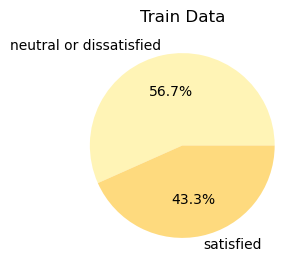

In [20]:
plt.figure(figsize=(3,3))
plt.pie(train_data.satisfaction.value_counts(),labels = ['neutral or dissatisfied','satisfied'], colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.title('Train Data')
plt.show()

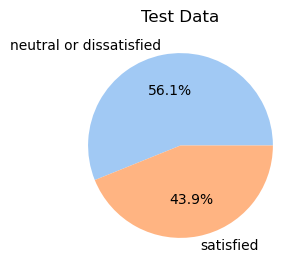

In [21]:
plt.figure(figsize=(3,3))
plt.pie(test_data.satisfaction.value_counts(),labels = ['neutral or dissatisfied','satisfied'], colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Test Data')
plt.show()

In [22]:
corr_mat = df_train.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.999139,0.999894,0.999894
Flight Distance,0.999139,1.000000,0.999602,0.999601
Departure Delay in Minutes,0.999894,0.999602,1.000000,1.000000
Arrival Delay in Minutes,0.999894,0.999601,1.000000,1.000000


<Axes: >

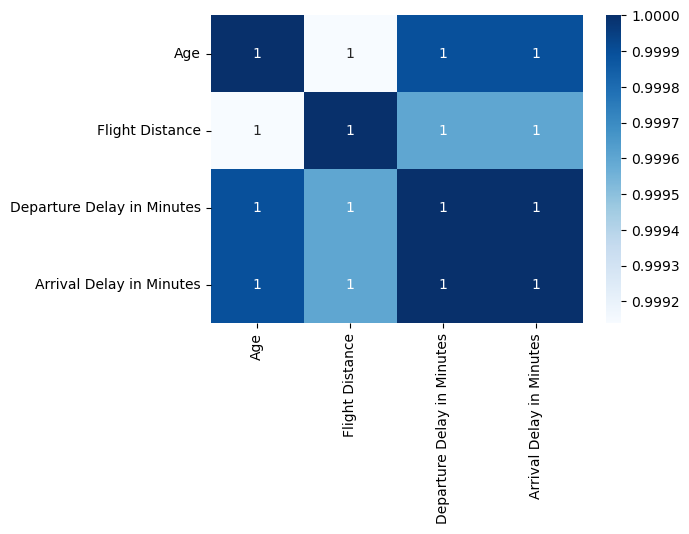

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot = True, cmap = 'Blues')


In [24]:
corr_mat = df_test.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.999139,0.999894,0.999894
Flight Distance,0.999139,1.000000,0.999602,0.999601
Departure Delay in Minutes,0.999894,0.999602,1.000000,1.000000
Arrival Delay in Minutes,0.999894,0.999601,1.000000,1.000000


<Axes: >

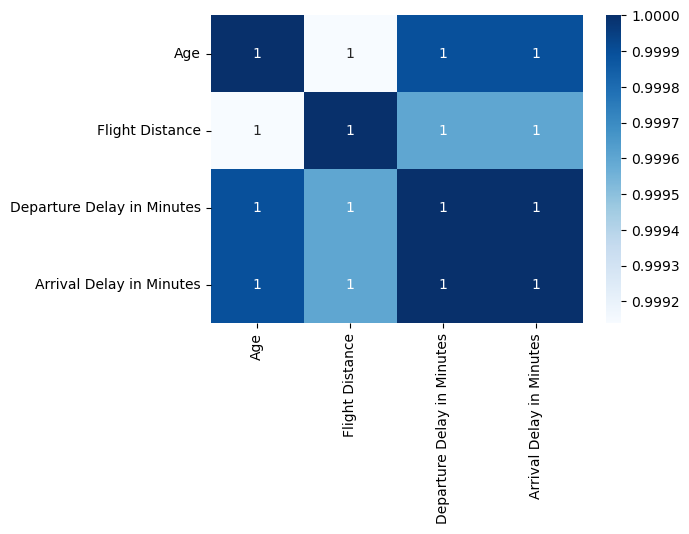

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot = True, cmap = 'Blues')

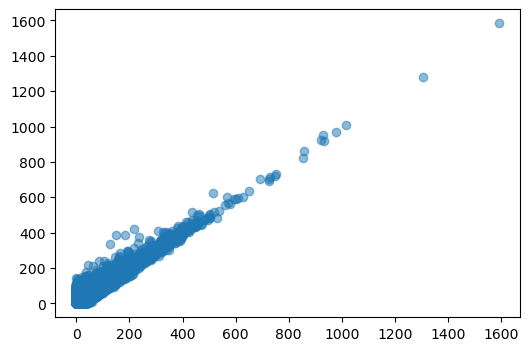

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(train_data['Departure Delay in Minutes'], train_data['Arrival Delay in Minutes'],alpha = 0.5 )
plt.show()

In [27]:
## You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. 
## Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.
## The results obtained are quite logical and can be explained as follows. 
## If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be 
## delayed by about the same amount of time at landing.

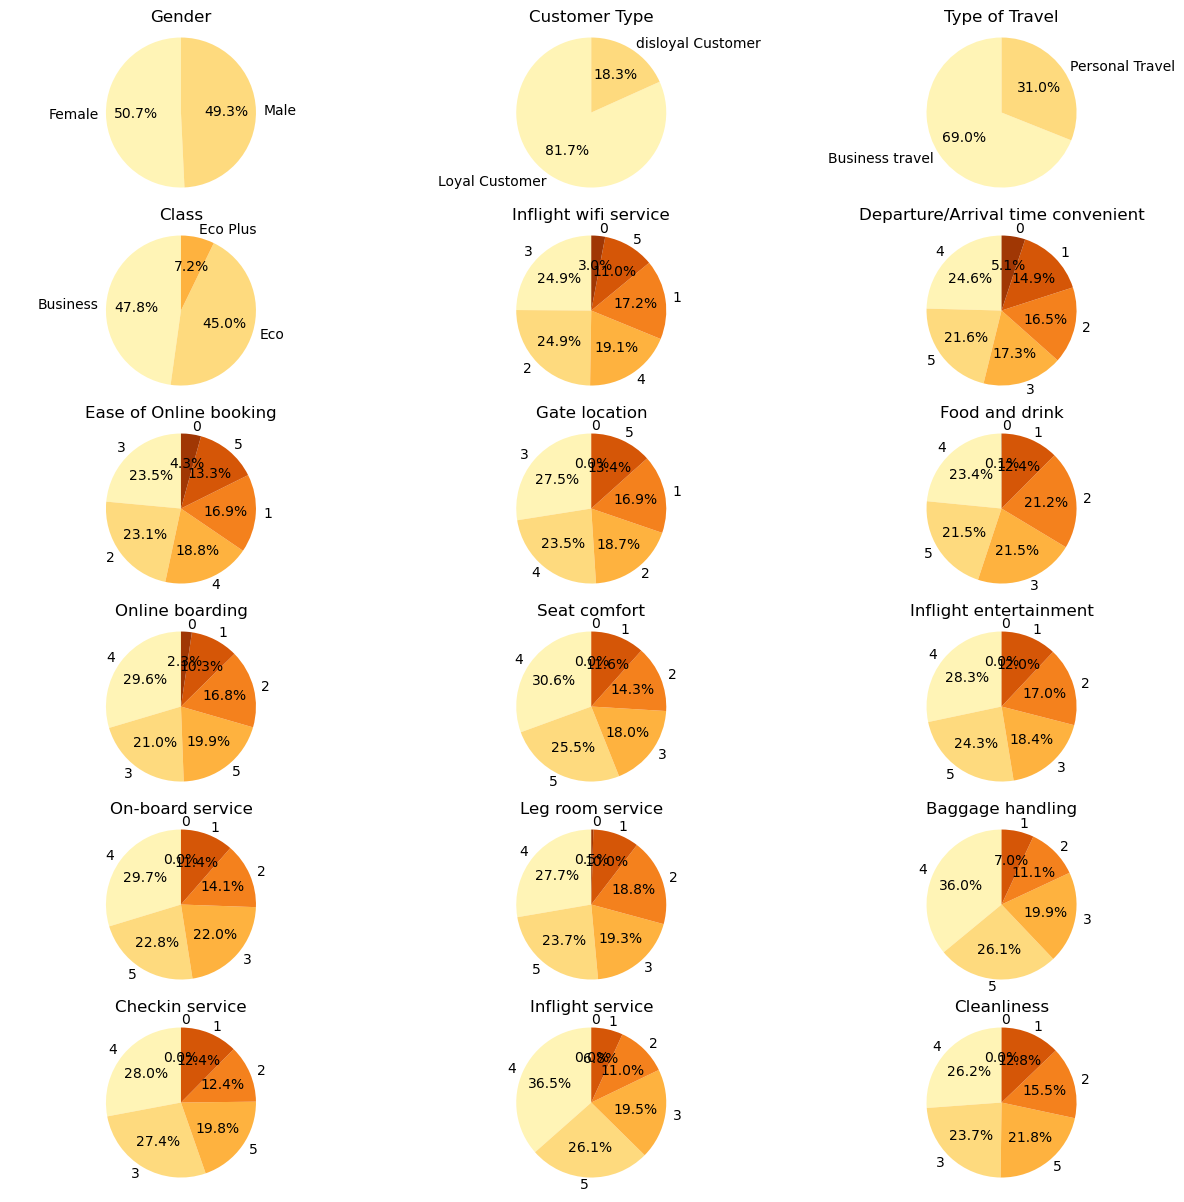

In [28]:
catg = train_data.loc[:,categorical_columns]
fig,axes = plt.subplots(6,3,figsize=(15,15))
for i,col in enumerate(catg):
    column_values = train_data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3,i%3].pie(sizes, labels=labels, colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%', startangle = 90)
    axes[i//3,i%3].axis('equal')
    axes[i//3,i%3].set_title(col)
plt.show()
        

C:\Users\MYPC\AppData\Local\Temp\ipykernel_3756\962740933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Type',y='Age',data=train_data,palette='YlOrBr', ax=axes[0])


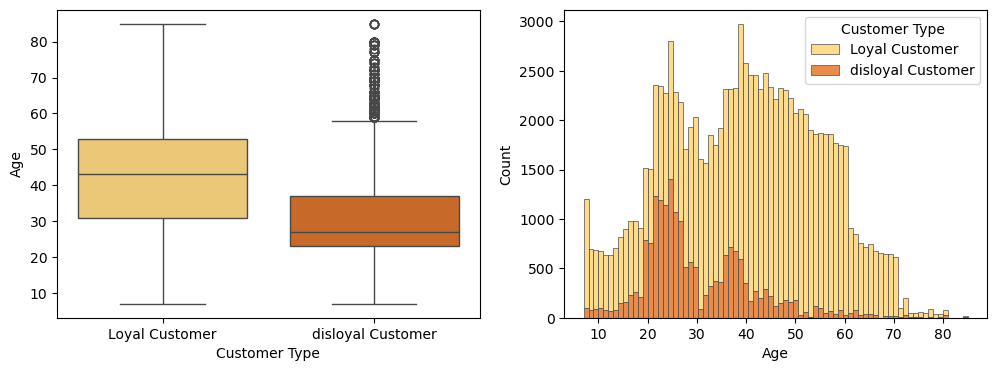

In [29]:
f,axes = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Customer Type',y='Age',data=train_data,palette='YlOrBr', ax=axes[0])
sns.histplot(train_data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = axes[1])
plt.show()

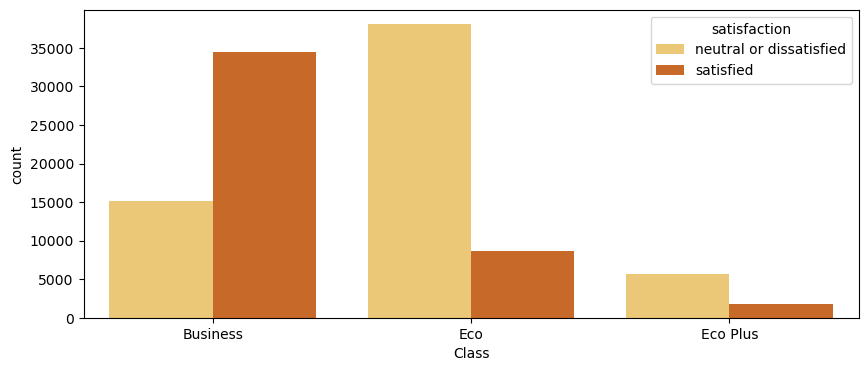

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_data, hue='satisfaction', x='Class', palette='YlOrBr')
plt.show()

## Preprocessing 

In [31]:
train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median(axis=0),inplace=True)
test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].median(axis=0),inplace=True)

C:\Users\MYPC\AppData\Local\Temp\ipykernel_3756\1904407927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median(axis=0),inplace=True)
C:\Users\MYPC\AppData\Local\Temp\ipykernel_3756\1904407927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [32]:
train_data.isnull().sum().sum(),test_data.isnull().sum().sum()

(0, 0)

In [33]:
## encoding the target variable
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

In [34]:
cat_cols = train_data.select_dtypes(include=['category']).columns.drop('satisfaction',errors='ignore')

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [36]:
# Split train_data into features and target
X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']

# For testing
X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']


In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((103904, 22), (25976, 22), (103904,), (25976,))

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##  Convert to Tensors and DataLoader

In [39]:
!pip install torch

In [40]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [41]:
# coverting to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

In [42]:
# Define Neural Network
class AirSatisfactionNN(nn.Module):
    def __init__(self,input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.net(x)
    

In [46]:
# model initialization
model = AirSatisfactionNN(input_dim=X_train.shape[1])
model

AirSatisfactionNN(
  (net): Sequential(
    (0): Linear(in_features=22, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [49]:
weights = model.named_parameters()

for name,weights in model.named_parameters():
    print(f'{name} : {weights.shape}')

net.0.weight : torch.Size([64, 22])
net.0.bias : torch.Size([64])
net.2.weight : torch.Size([32, 64])
net.2.bias : torch.Size([32])
net.4.weight : torch.Size([1, 32])
net.4.bias : torch.Size([1])


In [52]:
# Loss and optimization
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [51]:
for batch_X,batch_y in train_loader:
  print(batch_X.shape,batch_y.shape)

torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 22]) torch.Size([64, 1])
torch.Size([64, 

In [53]:
# training loop

epochs = 20
epoch_loss=[]
for epoch in range(epochs):
    model.train()
    train_loss=[]
    # set the model in train model, when model is in train mode then only gradients are computed
    for batch_X,batch_y in train_loader:
        y_pred=model(batch_X)
        # model(inputs) -> runs forward pass function
        loss = loss_function(y_pred,batch_y)
        # compute loss for the batch
        loss.backward()
        # compute all gradients using loss and chain rule
        optimizer.step()
        # weight updation using computed gradients
        optimizer.zero_grad()
        # delete the gradients for given batch once the weights are updated
        train_loss.append(loss.item())
        # store train-loss for individual batches

    avg_train_loss = sum(train_loss)/len(train_loss)
    print(f'Avg train loss after {epoch+1} epochs = {avg_train_loss}')
    epoch_loss.append(avg_train_loss)

Avg train loss after 1 epochs = 0.210110112139267
Avg train loss after 2 epochs = 0.14237881237939184
Avg train loss after 3 epochs = 0.1248261034511617
Avg train loss after 4 epochs = 0.11395927126464328
Avg train loss after 5 epochs = 0.10780310542942048
Avg train loss after 6 epochs = 0.10232385495055944
Avg train loss after 7 epochs = 0.09867477921305655
Avg train loss after 8 epochs = 0.09675060600567646
Avg train loss after 9 epochs = 0.09407663084578062
Avg train loss after 10 epochs = 0.09269803043155532
Avg train loss after 11 epochs = 0.0906775056839269
Avg train loss after 12 epochs = 0.09039526567576463
Avg train loss after 13 epochs = 0.08856508506260115
Avg train loss after 14 epochs = 0.0874299035637566
Avg train loss after 15 epochs = 0.08696920207611014
Avg train loss after 16 epochs = 0.0859686425543537
Avg train loss after 17 epochs = 0.08523534991339152
Avg train loss after 18 epochs = 0.08464555104986851
Avg train loss after 19 epochs = 0.08408105435862614
Avg trai

<Axes: >

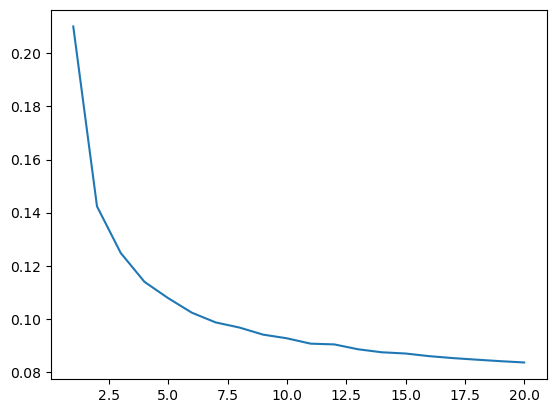

In [54]:
import seaborn as sns
sns.lineplot(x=range(1,len(epoch_loss)+1),y=epoch_loss)

In [55]:
## test loop
model.eval()
# sets model in eval mode, doesn;t compute gradients
test_loss=[]
with torch.no_grad():
    # again maling sure that no gradients will be computes
    for batch_X, batch_y in test_loader:
        y_pred = model(batch_X)
        loss = loss_function(y_pred,batch_y)
        test_loss.append(loss.item())

In [56]:
avg_test_loss = sum(test_loss)/len(test_loss)
print(f'Avg test loss = {avg_test_loss}')

Avg test loss = 0.0922547324234849


In [58]:
model.eval()
with torch.no_grad():
    preds = model(X_test)
    preds_class = (preds >= 0.5).float()
    accuracy = (preds_class == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item()*100:.2f}%")


Test Accuracy: 95.99%
